In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [2]:
#
# Portions of this code adapted from CMPT318D1 exercise 7.
#


OUTPUT_TEMPLATE = (
    'Bayesian classifier: {bayes:.3g} \n'
    'kNN classifier:      {knn:.3g} \n'
    'SVM classifier:      {svm:.3g} \n'
)



In [3]:
#
# Read file and decode into SVC format!
#

In [4]:
data = pd.read_csv('results_100-300_230_50.csv')

In [5]:
#
# one hot encoding
#

encode = data.iloc[:,1:]
cat = data.iloc[:,0]
cat = cat.values


In [6]:
all_vocab = encode.values.ravel()
all_vocab = all_vocab.astype(np.str)

In [7]:
u = np.unique(all_vocab)
vocab_sorter = np.argsort(u) 
vocab_dict = np.array(vocab_sorter[np.searchsorted(u, all_vocab, sorter=vocab_sorter)])


In [8]:
vocab_dict = vocab_dict.reshape(data.shape[0],20)

In [9]:
enc = OneHotEncoder()
# 2d array of samples
enc.fit(vocab_dict) 
svc_ready = enc.transform(vocab_dict).toarray()

In [10]:
# debug


#cat = cat.reshape(1009,1)
#data_final = np.concatenate((cat, svc_ready), axis = 1)
#svc_ready.shape

(1790, 20266)

In [11]:
#
# run classifier
#

In [12]:
X = svc_ready
y = cat

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33)

In [13]:


bayes_model = GaussianNB()


nn = 8
knn_model = KNeighborsClassifier(n_neighbors=nn)

c = 1
svc_model = SVC(C=c, kernel='linear')


models = [svc_model, bayes_model, knn_model]

for i, m in enumerate(models):
    m.fit(X_train, y_train)
    



In [15]:
svc_pred = svc_model.predict(X_test)    
sc = confusion_matrix(y_test, svc_pred)

bayes_pred = bayes_model.predict(X_test)    
bc = confusion_matrix(y_test, bayes_pred)


knn_pred = knn_model.predict(X_test)    
kc = confusion_matrix(y_test, knn_pred)


print(OUTPUT_TEMPLATE.format(
    bayes=bayes_model.score(X_test, y_test),
    
    knn=knn_model.score(X_test, y_test),
    
    svm=svc_model.score(X_test, y_test),
    
))

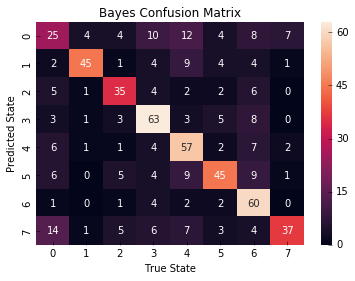

In [17]:
# output result

sn.heatmap(bc, annot=True)
plt.title('Bayes Confusion Matrix')
plt.xlabel('True State')
plt.ylabel('Predicted State')
plt.show()